In [1]:
import numpy as np
import pandas as pd

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


In [2]:
df = pd.read_csv("diamonds_train.csv", index_col=0)

In [3]:
df["cut"] = df["cut"].apply(lambda x: x.replace("Fair","0"))
df["cut"] = df["cut"].apply(lambda x: x.replace("Very Good","2"))
df["cut"] = df["cut"].apply(lambda x: x.replace("Good","1"))
df["cut"] = df["cut"].apply(lambda x: x.replace("Ideal","3"))
df["cut"] = df["cut"].apply(lambda x: x.replace("Premium","4"))
df["cut"] = df["cut"].astype(int)

df["color"] = df["color"].apply(lambda x: x.replace("D","0"))
df["color"] = df["color"].apply(lambda x: x.replace("E","1"))
df["color"] = df["color"].apply(lambda x: x.replace("F","2"))
df["color"] = df["color"].apply(lambda x: x.replace("G","3"))
df["color"] = df["color"].apply(lambda x: x.replace("H","4"))
df["color"] = df["color"].apply(lambda x: x.replace("I","5"))
df["color"] = df["color"].apply(lambda x: x.replace("J","6"))
df["color"] = df["color"].astype(int)

df["clarity"] = df["clarity"].apply(lambda x: x.replace("SI1","4"))
df["clarity"] = df["clarity"].apply(lambda x: x.replace("SI2","5"))
df["clarity"] = df["clarity"].apply(lambda x: x.replace("I1","0"))
df["clarity"] = df["clarity"].apply(lambda x: x.replace("IF","1"))
df["clarity"] = df["clarity"].apply(lambda x: x.replace("VVS1","2"))
df["clarity"] = df["clarity"].apply(lambda x: x.replace("VVS2","3"))
df["clarity"] = df["clarity"].apply(lambda x: x.replace("VS1","6"))
df["clarity"] = df["clarity"].apply(lambda x: x.replace("VS2","7"))
df["clarity"] = df["clarity"].astype(int)


<AxesSubplot:>

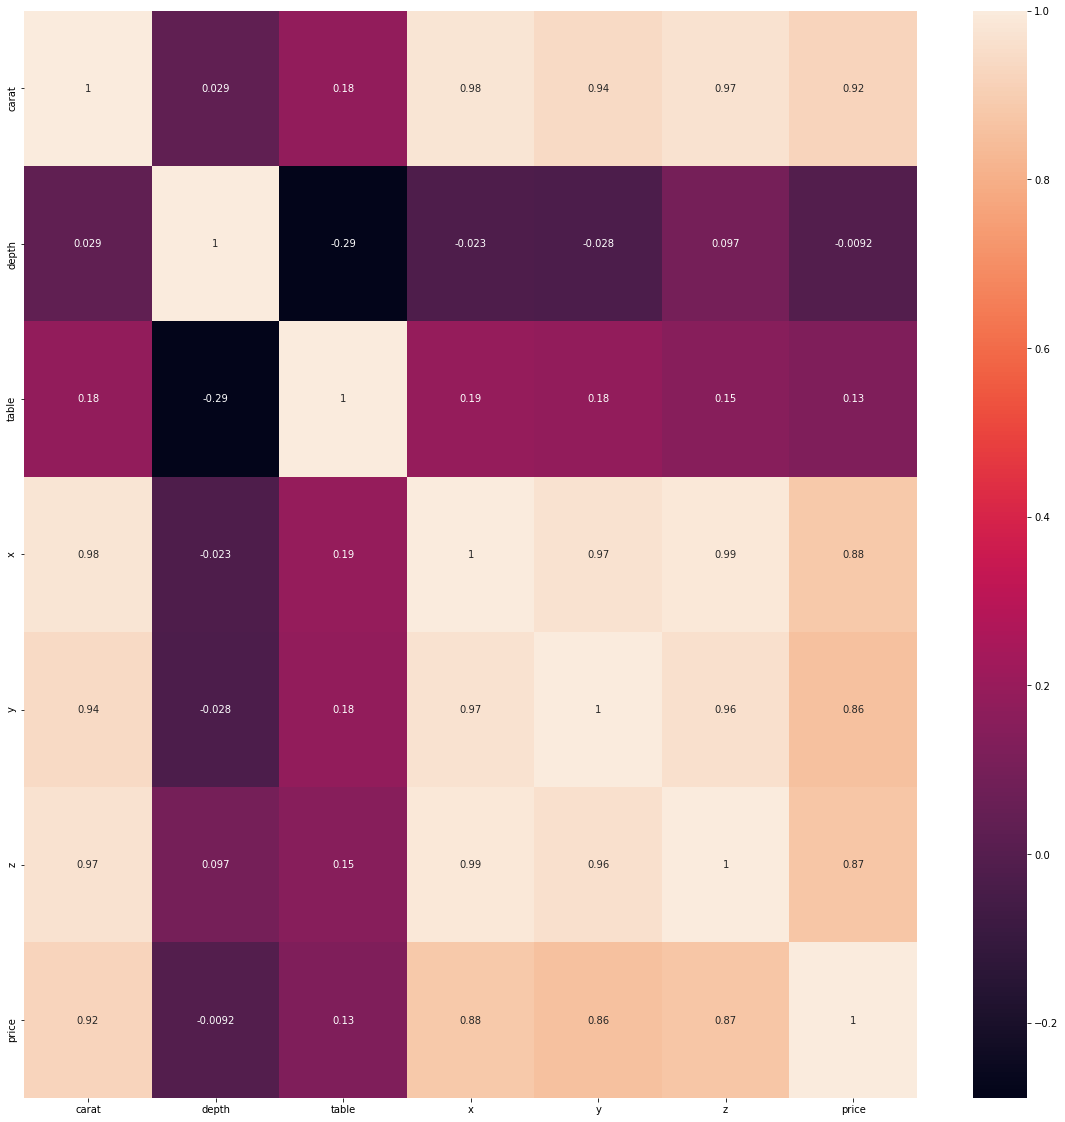

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

In [4]:
X = np.array(df[["carat","depth", "table", "x", "y", "z"]])
y = np.array(df["price"])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 13)

In [6]:
X_test

array([[ 1.01, 60.4 , 60.  ,  6.47,  6.44,  3.9 ],
       [ 0.3 , 61.8 , 60.  ,  4.29,  4.32,  2.66],
       [ 1.09, 61.8 , 55.  ,  6.59,  6.62,  4.08],
       ...,
       [ 0.9 , 61.3 , 58.  ,  6.08,  6.13,  3.74],
       [ 0.43, 61.  , 58.  ,  4.88,  4.83,  2.96],
       [ 1.27, 62.3 , 56.  ,  6.93,  6.85,  4.29]])

In [7]:
y_test

array([7094,  605, 6225, ..., 3780,  993, 5547], dtype=int64)

In [8]:
degree = 5
polinominal_model = PolynomialFeatures(degree) 
X_poly = polinominal_model.fit_transform(X_train, y_train)

lin_reg_model = LinearRegression()
lin_reg_model.fit(X_poly, y_train)
y_pred = lin_reg_model.predict(X_poly)

print("Score r2:", r2_score(y_train, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_true=y_train, y_pred=y_pred)))
print("MAE:", mean_absolute_error(y_true=y_train, y_pred=y_pred))

Score r2: 0.8866268541811347
RMSE: 1337.391057330119
MAE: 771.6662681961624


In [9]:
X_test_poly = polinominal_model.fit_transform(X_test)

y_test_pred = lin_reg_model.predict(X_test_poly)

In [10]:
r2_score(y_test, y_test_pred)

-4124429661582.7734

In [6]:
degree = 6
polinominal_model = PolynomialFeatures(degree) 
X_poly = polinominal_model.fit_transform(X_train, y_train)

lin_reg_model = LinearRegression()
lin_reg_model.fit(X_poly, y_train)
y_pred = lin_reg_model.predict(X_poly)

print("Score r2:", r2_score(y_train, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_true=y_train, y_pred=y_pred)))
print("MAE:", mean_absolute_error(y_true=y_train, y_pred=y_pred))

Score r2: 0.9857244694846989
RMSE: 474.56908624587254
MAE: 282.2447118044208


In [7]:
X_poly

array([[1.00000000e+00, 1.19000000e+00, 2.00000000e+00, ...,
        1.44925087e+04, 8.79226220e+03, 5.33405747e+03],
       [1.00000000e+00, 3.40000000e-01, 3.00000000e+00, ...,
        1.23652237e+03, 7.55501579e+02, 4.61603162e+02],
       [1.00000000e+00, 3.30000000e-01, 3.00000000e+00, ...,
        1.06031315e+03, 6.33831639e+02, 3.78890468e+02],
       ...,
       [1.00000000e+00, 7.00000000e-01, 3.00000000e+00, ...,
        5.01838707e+03, 3.06339802e+03, 1.87000470e+03],
       [1.00000000e+00, 1.03000000e+00, 4.00000000e+00, ...,
        1.02967683e+04, 6.15925410e+03, 3.68430268e+03],
       [1.00000000e+00, 3.70000000e-01, 4.00000000e+00, ...,
        1.28038673e+03, 7.68785123e+02, 4.61603162e+02]])

In [8]:
pd.DataFrame(y_train).head()

,0
0,6526
1,695
2,625
3,1128
4,8115


In [9]:
pd.DataFrame(y_pred).head()

,0
0,6503.231919
1,634.207139
2,742.867783
3,1205.273301
4,7871.787583


In [10]:
X_test.shape

(8069, 9)

In [11]:
X_test_poly

NameError: name 'X_test_poly' is not defined

In [25]:
y_test_pred = lin_reg_model.predict(X_test_poly)

In [24]:
print("RMSE:", np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_test_pred)))

RMSE: 73867644618.803


### PREDECIR DIAMOND TEST

In [7]:
X_pred = pd.read_csv("diamonds_test.csv", index_col = 0)

In [8]:
X_pred["cut"] = X_pred["cut"].apply(lambda x: x.replace("Fair","0"))
X_pred["cut"] = X_pred["cut"].apply(lambda x: x.replace("Very Good","2"))
X_pred["cut"] = X_pred["cut"].apply(lambda x: x.replace("Good","1"))
X_pred["cut"] = X_pred["cut"].apply(lambda x: x.replace("Ideal","3"))
X_pred["cut"] = X_pred["cut"].apply(lambda x: x.replace("Premium","4"))
X_pred["cut"] = X_pred["cut"].astype(int)

X_pred["color"] = X_pred["color"].apply(lambda x: x.replace("D","0"))
X_pred["color"] = X_pred["color"].apply(lambda x: x.replace("E","1"))
X_pred["color"] = X_pred["color"].apply(lambda x: x.replace("F","2"))
X_pred["color"] = X_pred["color"].apply(lambda x: x.replace("G","3"))
X_pred["color"] = X_pred["color"].apply(lambda x: x.replace("H","4"))
X_pred["color"] = X_pred["color"].apply(lambda x: x.replace("I","5"))
X_pred["color"] = X_pred["color"].apply(lambda x: x.replace("J","6"))
X_pred["color"] = X_pred["color"].astype(int)

X_pred["clarity"] = X_pred["clarity"].apply(lambda x: x.replace("SI1","4"))
X_pred["clarity"] = X_pred["clarity"].apply(lambda x: x.replace("SI2","5"))
X_pred["clarity"] = X_pred["clarity"].apply(lambda x: x.replace("I1","0"))
X_pred["clarity"] = X_pred["clarity"].apply(lambda x: x.replace("IF","1"))
X_pred["clarity"] = X_pred["clarity"].apply(lambda x: x.replace("VVS1","2"))
X_pred["clarity"] = X_pred["clarity"].apply(lambda x: x.replace("VVS2","3"))
X_pred["clarity"] = X_pred["clarity"].apply(lambda x: x.replace("VS1","6"))
X_pred["clarity"] = X_pred["clarity"].apply(lambda x: x.replace("VS2","7"))
X_pred["clarity"] = X_pred["clarity"].astype(int)

In [9]:
X_pred.shape

(13449, 9)

In [10]:
y_test_pred = lin_reg_model.predict(X_pred)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 5005 is different from 9)

In [19]:
pd.DataFrame(y_test_pred)

,0
0,326.560654
1,2159.077622
2,10019.381821
3,510.527085
4,9164.498521
...,...
13444,5220.089097
13445,482.074326
13446,13138.719956
13447,11686.612534


In [20]:
submission = pd.DataFrame({"id": range(len(y_test_pred)), "price": y_test_pred})

In [27]:
y = np.array(df["price"])
pd.DataFrame(y)

,0
0,6134
1,532
2,1103
3,600
4,4997
...,...
40340,11708
40341,619
40342,1267
40343,9965


In [28]:
submission

,id,price
0,0,326.560654
1,1,2159.077622
2,2,10019.381821
3,3,510.527085
4,4,9164.498521
...,...,...
13444,13444,5220.089097
13445,13445,482.074326
13446,13446,13138.719956
13447,13447,11686.612534


In [24]:
submission.to_csv("submission.csv", index = False)